In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import os 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
gdrive_dir = "gdrive/My Drive/CS3244"
train_data_dir = os.path.join(gdrive_dir, "datasets/Train")
test_data_dir = os.path.join(gdrive_dir, "datasets/Test")
# train
subject_id_train_filepath = os.path.join(train_data_dir, "subject_id_train.txt")
X_train_filepath = os.path.join(train_data_dir, "X_train.txt")
y_train_filepath = os.path.join(train_data_dir, "y_train.txt")
# test
subject_id_test_filepath = os.path.join(test_data_dir, "subject_id_test.txt")
X_test_filepath = os.path.join(test_data_dir, "X_test.txt")
y_test_filepath = os.path.join(test_data_dir, "y_test.txt")
# features
features_filepath = os.path.join(gdrive_dir, "datasets/features.txt")

In [ ]:
with open(features_filepath, 'r') as tf:
    features = tf.read().split('\n')
features = features[:-1] # remove last newline

# Read train data into pd
subject_id_train = pd.read_csv(subject_id_train_filepath, header=None)
X_train_df = pd.read_csv(X_train_filepath, header=None, delim_whitespace=True)
y_train_df = pd.read_csv(y_train_filepath, header=None)

X_train_df.columns = features
X_train_df.insert(0, 'subject_id', subject_id_train)
X_train_df

subject_id  ...  tZAxisAcc-AngleWRTGravity-1    
0              1  ...                        -0.051718
1              1  ...                        -0.047436
2              1  ...                        -0.042271
3              1  ...                        -0.040826
4              1  ...                        -0.037080
...          ...  ...                              ...
7762          30  ...                         0.056020
7763          30  ...                         0.056252
7764          30  ...                         0.047071
7765          30  ...                         0.031700
7766          30  ...                         0.042981

[7767 rows x 562 columns]

In [ ]:
# Read test data into pd
subject_id_test = pd.read_csv(subject_id_test_filepath, header=None)
X_test_df = pd.read_csv(X_test_filepath, header=None, delim_whitespace=True)
y_test_df = pd.read_csv(y_test_filepath, header=None)

# X_test_df.columns = features
# X_test_df.insert(0, 'subject_id', subject_id_test)
# y_test.columns = ['label']

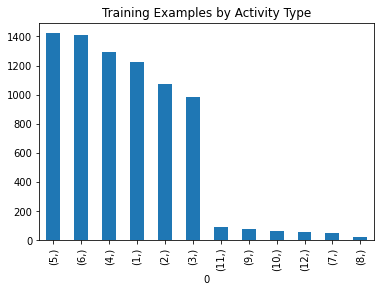

In [ ]:
# histogram visualization of training data
# we know there are 12 labels
# y_train_df.hist(bins=y_train_df.max()[0])
y_train_df.value_counts().plot(kind='bar',
                          title='Training Examples by Activity Type')

From the above histogram, we observe that our data is highly imbalanced for labels concerning the transition of one position to the next compared to the labels for the positions. Even amongst the position labels, a small degree of imbalance can be observed; largest between position 3 and position 5.

Resampling may need to be considered.

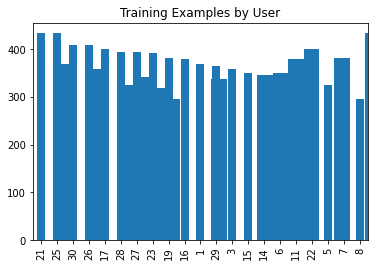

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                            0.043580  ...                        -0.051718
1                            0.039480  ...                        -0.047436
2                            0.039978  ...                        -0.042271
3                            0.039785  ...                        -0.040826
4                            0.038758  ...                        -0.037080
...                               ...  ...                              ...
6594                         0.052110  ...                         0.368941
6595                         0.027060  ...                         0.376718
6596                         0.010848  ...                         0.387294
6597                         0.037183  ...                         0.406281
6598                         0.048483  ...                         0.408951

[6599 rows x 561 columns]

In [ ]:
# Spliting of data set 
# We should split the data set by users rather than by a percentage
# Only worrying about having at least a few example records per activity is not sufficient (credit https://towardsdatascience.com/human-activity-recognition-har-tutorial-with-keras-and-core-ml-part-1-8c05e365dfa0 )

X_train_df.hist(column="subject_id", bins = subject_id_train.max()[0])
X_train_df['subject_id'].value_counts().plot(kind='bar',
                                  title='Training Examples by User')
plt.show()
# observed from the histogram, we have a decent spread of data among the participants in the training set

X_train = X_train_df[X_train_df['subject_id'] <= 27].drop(columns=['subject_id'])
X_val = X_train_df[X_train_df['subject_id'] > 27].drop(columns=['subject_id'])

X_train

In [ ]:
y_train_df.insert(0, 'subject_id', subject_id_train)
y_train = y_train_df[y_train_df['subject_id'] <= 27]
y_val = y_train_df[y_train_df['subject_id'] > 27]
y_train = y_train.drop(columns=['subject_id'])
y_val = y_val.drop(columns=['subject_id'])
y_train_df = y_train_df.drop(columns=['subject_id'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test_df)

import sklearn.metrics as metrics

print("Accuracy: ", metrics.accuracy_score( y_test_df, y_pred))
print("F1 macro: ", metrics.f1_score( y_test_df, y_pred, average="macro"))
print("F1 micro: ", metrics.f1_score(y_test_df, y_pred, average="micro"))
print("F1 weighted: ", metrics.f1_score(y_test_df, y_pred, average="weighted"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="macro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="micro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="weighted"))
print("Recall macro: ", metrics.recall_score(y_test_df, y_pred, average="macro"))
print("Recall micro: ", metrics.recall_score(y_test_df, y_pred, average="micro"))
print("Recall weighted: ", metrics.recall_score(y_test_df, y_pred, average="weighted"))

Accuracy:  0.8339658444022771
F1 macro:  0.7061464774264808
F1 micro:  0.8339658444022771
F1 weighted:  0.8339672288265862
Precision:  0.6941919034339717
Precision:  0.8339658444022771
Precision:  0.8359698409649554
Recall macro:  0.7276853212678073
Recall micro:  0.8339658444022771
Recall weighted:  0.8339658444022771


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


We can use above as a baseline model with lower accuracy

In [ ]:
with open(features_filepath, 'r') as tf:
    features = tf.read().split('\n')
features = features[:-1] # remove last newline

# Read train data into pd
subject_id_train = pd.read_csv(subject_id_train_filepath, header=None)
subject_id_test = pd.read_csv(subject_id_test_filepath, header=None)
X_train_df = pd.read_csv(X_train_filepath, header=None, delim_whitespace=True)
y_train_df = pd.read_csv(y_train_filepath, header=None)

X_train_df.columns = features
#X_train_df.insert(0, 'subject_id', subject_id_train)
y_train_df.shape

(7767, 1)

In [ ]:
subject_id_test = pd.read_csv(subject_id_test_filepath, header=None)
X_test_df = pd.read_csv(X_test_filepath, header=None, delim_whitespace=True)
y_test_df = pd.read_csv(y_test_filepath, header=None)

X_test_df.columns = features

In [ ]:
frames = [X_train_df, X_test_df]
result = pd.concat(frames)
result

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                            0.043580  ...                        -0.051718
1                            0.039480  ...                        -0.047436
2                            0.039978  ...                        -0.042271
3                            0.039785  ...                        -0.040826
4                            0.038758  ...                        -0.037080
...                               ...  ...                              ...
3157                         0.052279  ...                         0.190104
3158                         0.073745  ...                         0.187748
3159                         0.068334  ...                         0.186527
3160                         0.023016  ...                         0.192865
3161                        -0.010846  ...                         0.193402

[10929 rows x 561 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()

result_transformed = sc.fit_transform(result)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(result_transformed)
reduced_result = pca.transform(result_transformed)
pca.n_components_

106

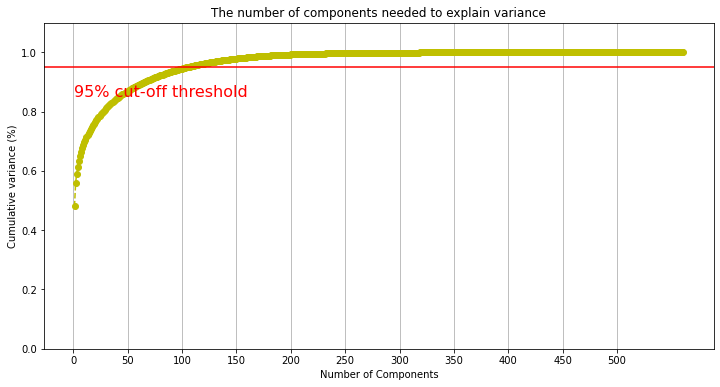

In [ ]:
pca = PCA().fit(result_transformed)

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 562, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='y')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 550, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
X_train_pca = reduced_result[0:7767]
X_test_pca = reduced_result[7767:]

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_pca, y_train_df)
accuracy = model.score(X_test_pca, y_test_df)
accuracy

0.7574320050600886

Here we see the accuracy decreased after applying PCA. Let's apply LDA to see if it increases

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # for LDA analysis
lda = LDA()
X_lda = lda.fit_transform(result_transformed, pd.concat([y_train_df, y_test_df]))
X_lda.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(10929, 11)

In [ ]:
lda.explained_variance_ratio_

array([0.60434446, 0.19352183, 0.06733791, 0.0480909 , 0.03632435,
       0.02301555, 0.00981925, 0.00939083, 0.00361127, 0.00287996,
       0.00166369])

In [ ]:
X_train_lda = X_lda[0:7767]
X_test_lda = X_lda[7767:]

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_lda, y_train_df)
y_pred = dt_model.predict(X_test_lda)
y_score = dt_model.predict_proba(X_test_lda)

import sklearn.metrics as metrics

print("Accuracy: ", metrics.accuracy_score( y_test_df, y_pred))
print("F1 macro: ", metrics.f1_score( y_test_df, y_pred, average="macro"))
print("F1 micro: ", metrics.f1_score(y_test_df, y_pred, average="micro"))
print("F1 weighted: ", metrics.f1_score(y_test_df, y_pred, average="weighted"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="macro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="micro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="weighted"))
print("Recall macro: ", metrics.recall_score(y_test_df, y_pred, average="macro"))
print("Recall micro: ", metrics.recall_score(y_test_df, y_pred, average="micro"))
print("Recall weighted: ", metrics.recall_score(y_test_df, y_pred, average="weighted"))

Accuracy:  0.9614168247944339
F1 macro:  0.887220517261608
F1 micro:  0.9614168247944339
F1 weighted:  0.9612838445051187
Precision:  0.8936207349852485
Precision:  0.9614168247944339
Precision:  0.9626056622198801
Recall macro:  0.8906816474437015
Recall micro:  0.9614168247944339
Recall weighted:  0.9614168247944339
